<a href="https://colab.research.google.com/github/anejung/fluorescent-protein/blob/main/brightness_level_each_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# อัปโหลด CSV ที่โหลดมาจาก FPbase
from google.colab import files
uploaded = files.upload()

# อ่านข้อมูล
df = pd.read_csv("Fluorescent Protein Properties.csv")  # แก้ชื่อไฟล์ตามที่ได้จริง
df.head()


Saving Fluorescent Protein Properties.csv to Fluorescent Protein Properties (1).csv


,Name,Ex max (nm),Em max (nm),Stokes Shift (nm),Extinction Coefficient,Quantum Yield,Brightness,pKa,Oligomerization,Maturation (min),Lifetime (ns),Molecular Weight (kDa),Switch Type,Aliases
0,AausFP1 (AausFP1),504.0,510.0,6.0,170000,0.97,164.90,4.40,d,NaN,NaN,25.72,b,NaN
1,vsfGFP-0,485.0,510.0,25.0,209916,0.76,159.54,4.84,d,NaN,NaN,38.39,b,"dimeric vsfGFP, vGFP-0"
2,oxStayGold,497.0,506.0,9.0,169000,0.93,157.17,NaN,d,NaN,NaN,24.66,b,NaN
3,StayGold,496.0,505.0,9.0,159000,0.93,147.87,4.00,d,14.0,NaN,24.61,b,CU17S-V168A
4,td8oxStayGold,496.0,506.0,10.0,157000,0.93,146.01,NaN,td,NaN,NaN,54.17,b,td8oxSG


/tmp/ipython-input-12-1006127911.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Color', y='Brightness', data=df, order=color_order, palette=custom_palette)


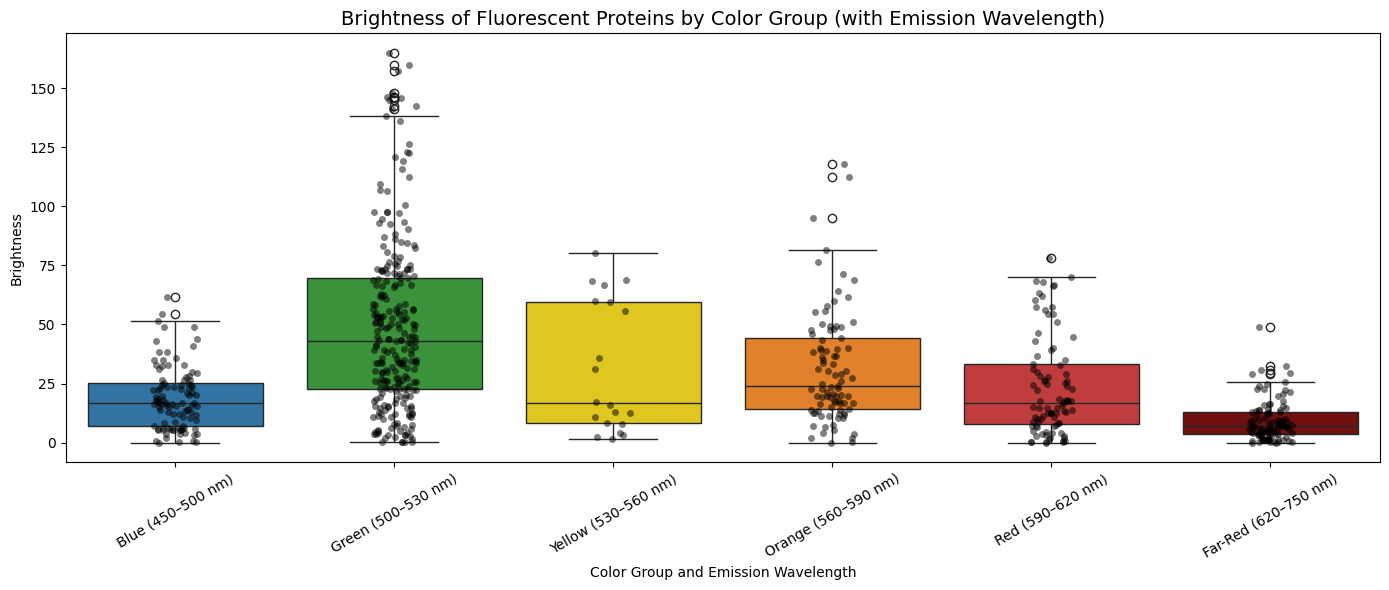

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดและเตรียมข้อมูล
df = pd.read_csv("Fluorescent Protein Properties.csv")
df = df.rename(columns={
    'Ex max (nm)': 'Ex_max',
    'Em max (nm)': 'Em_max',
    'Extinction Coefficient': 'ExtCoeff',
    'Quantum Yield': 'QY',
    'Brightness': 'Brightness'
})
df = df[['Name', 'Em_max', 'Brightness']].dropna()

# แปลง Em_max เป็นกลุ่มสีพร้อม wavelength
def assign_color(wavelength):
    if wavelength < 500:
        return 'Blue (450–500 nm)'
    elif 500 <= wavelength < 530:
        return 'Green (500–530 nm)'
    elif 530 <= wavelength < 560:
        return 'Yellow (530–560 nm)'
    elif 560 <= wavelength < 590:
        return 'Orange (560–590 nm)'
    elif 590 <= wavelength < 620:
        return 'Red (590–620 nm)'
    else:
        return 'Far-Red (620–750 nm)'

df['Color'] = df['Em_max'].apply(assign_color)

# ลำดับของสีในแกน X
color_order = [
    'Blue (450–500 nm)',
    'Green (500–530 nm)',
    'Yellow (530–560 nm)',
    'Orange (560–590 nm)',
    'Red (590–620 nm)',
    'Far-Red (620–750 nm)'
]

# สีที่ตรงกับชื่อสีจริง
custom_palette = {
    'Blue (450–500 nm)': '#1f77b4',       # น้ำเงิน
    'Green (500–530 nm)': '#2ca02c',      # เขียว
    'Yellow (530–560 nm)': '#ffdf00',     # เหลือง
    'Orange (560–590 nm)': '#ff7f0e',     # ส้ม
    'Red (590–620 nm)': '#d62728',        # แดง
    'Far-Red (620–750 nm)': '#800000'     # ม่วงแดงเข้ม
}

# วาดกราฟ
plt.figure(figsize=(14,6))
sns.boxplot(x='Color', y='Brightness', data=df, order=color_order, palette=custom_palette)
sns.stripplot(x='Color', y='Brightness', data=df, color='black', alpha=0.5, order=color_order)

plt.title('Brightness of Fluorescent Proteins by Color Group (with Emission Wavelength)', fontsize=14)
plt.ylabel('Brightness')
plt.xlabel('Color Group and Emission Wavelength')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
